In [1]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 49kB/s 
     |████████████████████████████████| 3.2MB 41.5MB/s 
     |████████████████████████████████| 491kB 42.5MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [2]:
%matplotlib inline

!unzip try.zip

Archive:  try.zip
   creating: try/fresh/
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.55.48 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.55.58 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.56.02 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.56.16 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.56.20 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.56.35 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.56.43 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.56.48 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.56.55 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.57.07 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.57.37 PM.png  
  inflating: try/fresh/rotated_by_15_Screen Shot 2018-06-12 at 11.5

In [0]:
#Importing Libraries
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [0]:
#initializations 
EPOCHS = 25
INIT_LR = 1e-2
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'try'
width=256
height=256
depth=3

In [0]:
def convert_image_to_array(image_dir):
    try:
       
        image = cv2.imread(image_dir)
        
        if image is not None :
            
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [8]:

image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        image_director = listdir(f"{directory_root}/{plant_folder}")
    
        for image_directory in image_director:
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".PNG") == True or image_directory.endswith(".png") == True :
                    image_directory = f"{directory_root}/{plant_folder}/{image_directory}"
                    image_list.append(convert_image_to_array(image_directory))
                    if(plant_folder == "fresh"):
                        label_list.append(0)
                    else:
                        label_list.append(1)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")
#print(image_list[0])

label_list = to_categorical(label_list)


[INFO] Loading images ...
[INFO] Image loading completed


In [9]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(n_classes)

2


In [10]:


print(label_binarizer.classes_)



[0 1]


In [0]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [12]:


print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.10, random_state = 78) 



[INFO] Spliting data to train, test


In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [14]:
chanDim = 1

model = Sequential() 
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))




In [15]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 122, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)       

In [16]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [17]:


history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
7/7 [==============================] - 101s 14s/step - loss: 1.5730 - accuracy: 0.7411 - val_loss: 5.3523 - val_accuracy: 0.6071
Epoch 2/25
7/7 [==============================] - 94s 13s/step - loss: 0.6545 - accuracy: 0.8333 - val_loss: 6.5910 - val_accuracy: 0.5714
Epoch 3/25
7/7 [==============================] - 96s 14s/step - loss: 0.5193 - accuracy: 0.8273 - val_loss: 6.5910 - val_accuracy: 0.5714
Epoch 4/25
7/7 [==============================] - 97s 14s/step - loss: 0.5809 - accuracy: 0.8304 - val_loss: 6.5910 - val_accuracy: 0.5714
Epoch 5/25
7/7 [==============================] - 96s 14s/step - loss: 0.5054 - accuracy: 0.8455 - val_loss: 6.5910 - val_accuracy: 0.5714
Epoch 6/25
7/7 [==============================] - 97s 14s/step - loss: 0.5688 - accuracy: 0.8227 - val_loss: 6.5910 - val_accuracy: 0.5714
Epoch 7/25
7/7 [==============================] - 98s 14s/step - loss:

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

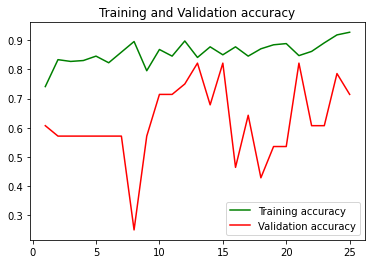

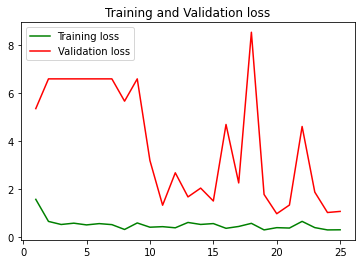

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [20]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
28/28 [==============================] - 3s 117ms/step
Test Accuracy: 71.42857313156128


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/CNN_GUI_Orange.h5')
#save the model in the drive and download it for the deployment